# CSCE 633 - Machine Learning - Homework 1
## Name: Guru Sarath Thangamani
## UIN: 829009551
## Jupyter notebook (Question 2)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the train, dev and test data set
train_set = np.loadtxt('hw1_question1_train.csv', delimiter = ',', dtype = int)
dev_set = np.loadtxt('hw1_question2_dev.csv', delimiter = ',', dtype = int)
test_set = np.loadtxt('hw1_question2_test.csv', delimiter = ',', dtype = int)

# Question (a.i)

In [3]:
#Question (a.i)

#Extract only the last column (Class)
train_set_outcome = train_set[:,-1]

#Count the number of benign and malignant cases
print('Number of benign cases = ', np.sum(train_set_outcome == 2))
print('Number of malignant cases = ', np.sum(train_set_outcome == 4))

Number of benign cases =  330
Number of malignant cases =  153


# Question (a.ii)

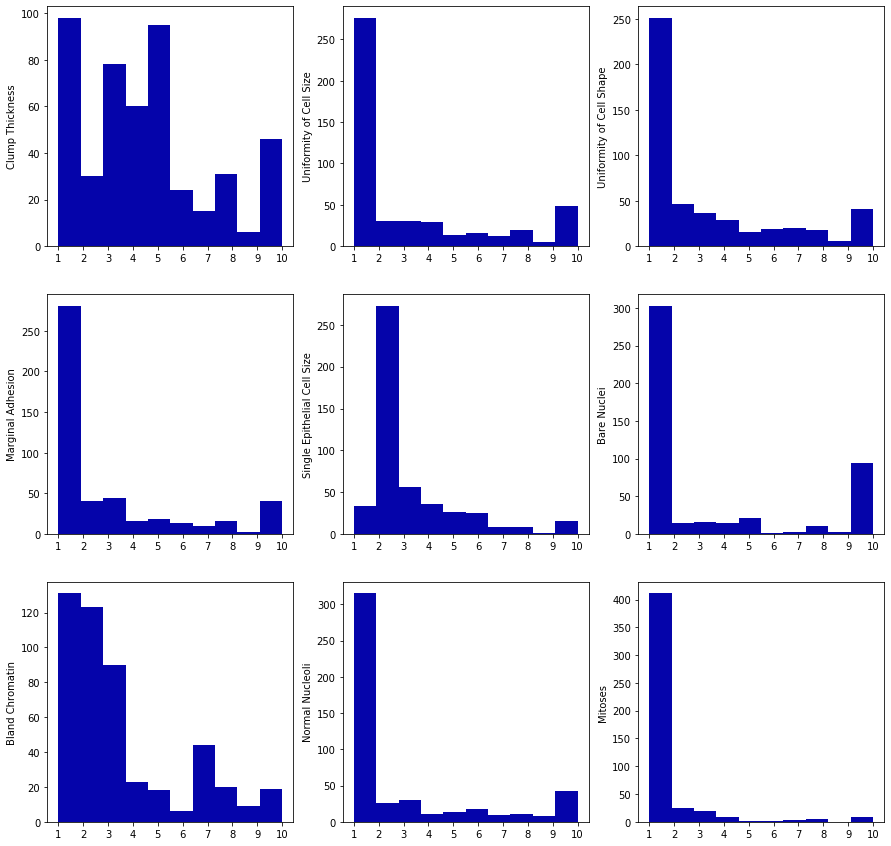

In [4]:
#Question (a.ii)

#list names of the each feature in the dataset
feature_names = ['Clump Thickness', 
'Uniformity of Cell Size',
'Uniformity of Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Bland Chromatin',
'Normal Nucleoli',
'Mitoses']

#extract the corresponding features
features = []
for i in range(9):
	features.append(train_set[:,i])

xi = [1,2,3,4,5,6,7,8,9,10]

#plot the histogram of each feature
plt.subplots(3,3,figsize=(15,15))
for i in range(9):
	plt.subplot(3,3,i+1)
	plt.ylabel(feature_names[i])
	plt.xticks(xi)
	plt.hist(x=features[i], bins=10, color='#0504aa')

plt.show()

# Question (a.iii)

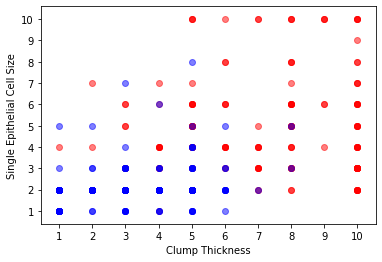

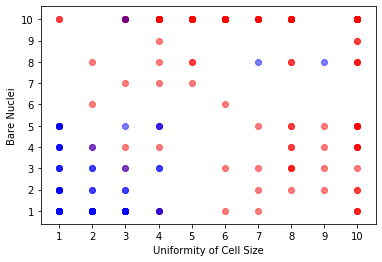

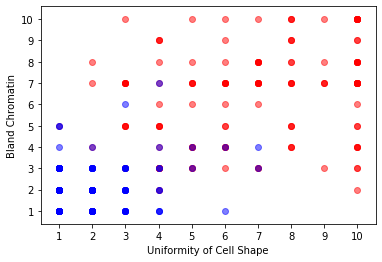

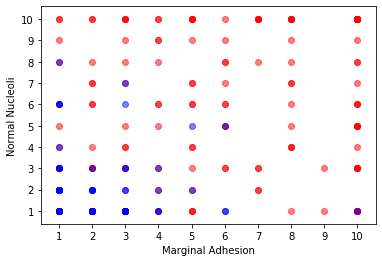

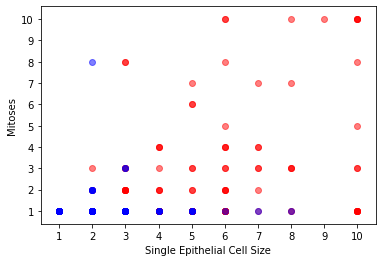

In [5]:
#Question (a.iii)
train_set_outcome = train_set[:,-1]

#Create 5 scatter plots
for i in range(5):

	j = i + 4

	x = features[i]
	y = features[j]

	x_benign = []
	y_benign = []
	x_malign = []
	y_malign = []

	#Generate separate lists for benign and malignant case
	for k,outcome in enumerate(train_set_outcome):
		
		if outcome == 2: #benign
			x_benign.append(x[k])
			y_benign.append(y[k])

		if outcome == 4: #malignant
			x_malign.append(x[k])
			y_malign.append(y[k])

	#plot the scatter plot
	plt.xlabel(feature_names[i])
	plt.ylabel(feature_names[j])
	plt.xticks(xi)
	plt.yticks(xi)
	plt.scatter(x_malign,y_malign, c='red', alpha=0.5)
	plt.scatter(x_benign, y_benign, c='Blue', alpha=0.5)
	plt.show()


# Question (b.i)

In [6]:
def L2_Norm(sample1 , sample2):
	delta = sample1 - sample2
	delta = delta**2
	sum_ = np.sum(delta)
	return sum_**0.5

def L1_Norm(sample1, sample2):
	delta = sample1 - sample2
	return np.sum(np.abs(delta))

def CosineSimilarity(sample1, sample2):

	n = sample1.shape[0]

	dotProd = 0
	for i in range(n):
		dotProd += sample1[i] * sample2[i]

	A = 0
	for i in range(n):
		A += sample1[i]**2
	A = A**0.5

	B = 0
	for i in range(n):
		B += sample2[i]**2
	B = B**0.5

	return dotProd / (A*B)

In [7]:
def keyForSort(element):
	return element[0]

In [8]:
# This function takes a sorted list of norms and class 
# [(norm1, class1), (norm2, class2), (norm3, class3) ...]
# and then makes prediction of the class
def predict(NormsAndOutComesList, K=3):

	class_dict = dict()

	for i in range(K):

		outcome = NormsAndOutComesList[i][1]

		if outcome not in class_dict:
			class_dict[outcome] = 1
		else:
			class_dict[outcome] += 1


	#Check which class has the highest count
	max_class = None
	max_count = 0
	for classX in class_dict:

		if class_dict[classX] > max_count:
			max_class = classX
			max_count = class_dict[classX]

	return max_class


#This functions runns KNN and returns the predictions
def run(dataSet, trainDataSet, K=3, Distance = L2_Norm):

	predictions = []

	for inputSample in dataSet:

		ListOfAllNorms_and_outcomes = []
		for trainSample in trainDataSet:

			DistanceX = Distance(inputSample[:-1], trainSample[:-1])
			ListOfAllNorms_and_outcomes.append(  (DistanceX , trainSample[-1])  )

		ListOfAllNorms_and_outcomes.sort(key=keyForSort)
		predictions.append(predict(ListOfAllNorms_and_outcomes, K))

	return np.array(predictions)

In [9]:
def accuracy(predictions, actual):
	correct = np.sum(predictions == actual)
	return correct / predictions.shape[0]

In [10]:
def Baccuracy(predictions, actual):
	correct_1 = np.sum( np.logical_and( np.equal(predictions, 2) , np.equal(actual, 2)) )
	correct_2 = np.sum( np.logical_and( np.equal(predictions, 4) , np.equal(actual, 4)) )

	samples_1 = np.sum(actual == 2)
	samples_2 = np.sum(actual == 4)

	return ((correct_1 / samples_1) + (correct_2 / samples_2))/2

# Question (b.ii)

K =  1
Accuracy =  0.97
BAccuracy =  0.9708557255064076
K =  3
Accuracy =  0.99
BAccuracy =  0.9915254237288136
K =  5
Accuracy =  0.98
BAccuracy =  0.9793303017775941
K =  7
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  9
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  11
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  13
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  15
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  17
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  19
Accuracy =  0.97
BAccuracy =  0.9671351798263745


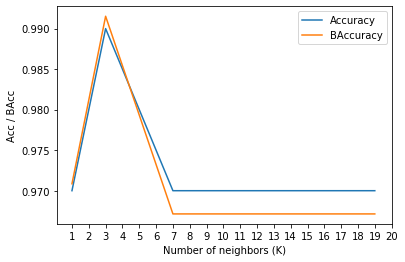

In [11]:
x_axis_K = []
y_axis_acc = []
y_axis_Bacc = []

distances = [L2_Norm, L1_Norm, CosineSimilarity]
dataSets = [dev_set, test_set]

        
# Dataset for which we want to calculate accuracy
dataSet_run = dev_set 

# Run KNN for diffrent values of K
for i in range(20):
    if i%2 == 0:
        continue

    print('K = ', i)
    preds = run(dataSet_run, train_set, K=i, Distance = L2_Norm)
    acc = accuracy(preds, dataSet_run[:,-1])
    b_acc = Baccuracy(preds, dataSet_run[:,-1])
    print('Accuracy = ', acc)
    print('BAccuracy = ', b_acc)

    x_axis_K.append(i)
    y_axis_acc.append(acc)
    y_axis_Bacc.append(b_acc)

#plot the acc vs K plot
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis_K, y_axis_acc, label = 'Accuracy')
plt.plot(x_axis_K, y_axis_Bacc, label = 'BAccuracy')
plt.ylabel('Acc / BAcc')
plt.xlabel('Number of neighbors (K)')
plt.xticks(xi)
axes = plt.gca()
axes.legend()
plt.show()


### K1 = 3
### K2 = 3

# Question (b.iii)

K =  1
Accuracy =  0.94
BAccuracy =  0.9189189189189189
K =  3
Accuracy =  0.95
BAccuracy =  0.9324324324324325
K =  5
Accuracy =  0.95
BAccuracy =  0.9324324324324325
K =  7
Accuracy =  0.94
BAccuracy =  0.9189189189189189
K =  9
Accuracy =  0.94
BAccuracy =  0.9189189189189189
K =  11
Accuracy =  0.93
BAccuracy =  0.9054054054054055
K =  13
Accuracy =  0.93
BAccuracy =  0.9054054054054055
K =  15
Accuracy =  0.93
BAccuracy =  0.9054054054054055
K =  17
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  19
Accuracy =  0.92
BAccuracy =  0.8918918918918919


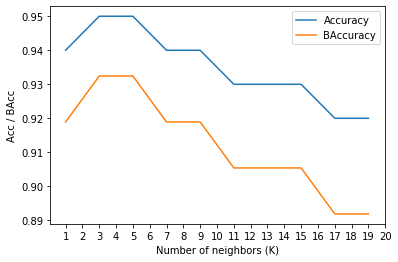

In [12]:
x_axis_K = []
y_axis_acc = []
y_axis_Bacc = []

distances = [L2_Norm, L1_Norm, CosineSimilarity]
dataSets = [dev_set, test_set]

        
# Dataset for which we want to calculate accuracy
dataSet_run = test_set 

# Run KNN for diffrent values of K
for i in range(20):
    if i%2 == 0:
        continue

    print('K = ', i)
    preds = run(dataSet_run, train_set, K=i, Distance = L2_Norm)
    acc = accuracy(preds, dataSet_run[:,-1])
    b_acc = Baccuracy(preds, dataSet_run[:,-1])
    print('Accuracy = ', acc)
    print('BAccuracy = ', b_acc)
    
    x_axis_K.append(i)
    y_axis_acc.append(acc)
    y_axis_Bacc.append(b_acc)

#plot the acc vs K plot
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis_K, y_axis_acc, label = 'Accuracy')
plt.plot(x_axis_K, y_axis_Bacc, label = 'BAccuracy')
plt.ylabel('Acc / BAcc')
plt.xlabel('Number of neighbors (K)')
plt.xticks(xi)
axes = plt.gca()
axes.legend()
plt.show()

### K1=  3
### k1 Accuracy =  0.95
### k1 BAccuracy =  0.9324324324324325

### K2=  3
### k2 Accuracy =  0.95
### k2 BAccuracy =  0.9324324324324325

# Question (b.iv)

##### For L1 Norm (Dev Set)

K =  1
Accuracy =  0.98
BAccuracy =  0.9793303017775941
K =  3
Accuracy =  0.98
BAccuracy =  0.9793303017775941
K =  5
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  7
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  9
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  11
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  13
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  15
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  17
Accuracy =  0.97
BAccuracy =  0.9671351798263745
K =  19
Accuracy =  0.97
BAccuracy =  0.9671351798263745


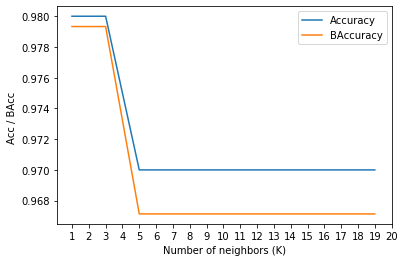

In [13]:
x_axis_K = []
y_axis_acc = []
y_axis_Bacc = []

distances = [L2_Norm, L1_Norm, CosineSimilarity]
dataSets = [dev_set, test_set]

        
# Dataset for which we want to calculate accuracy
dataSet_run = dev_set 

# Run KNN for diffrent values of K
for i in range(20):
    #Skip even numbers
    if i%2 == 0:
        continue

    print('K = ', i)
    preds = run(dataSet_run, train_set, K=i, Distance = L1_Norm)
    acc = accuracy(preds, dataSet_run[:,-1])
    b_acc = Baccuracy(preds, dataSet_run[:,-1])
    print('Accuracy = ', acc)
    print('BAccuracy = ', b_acc)

    x_axis_K.append(i)
    y_axis_acc.append(acc)
    y_axis_Bacc.append(b_acc)

#plot the acc vs K plot
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis_K, y_axis_acc, label = 'Accuracy')
plt.plot(x_axis_K, y_axis_Bacc, label = 'BAccuracy')
plt.ylabel('Acc / BAcc ')
plt.xlabel('Number of neighbors (K)')
plt.xticks(xi)
axes = plt.gca()
axes.legend()
plt.show()

##### For L1 Norm (Test Set)

K =  1
Accuracy =  0.95
BAccuracy =  0.9324324324324325
K =  3
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  5
Accuracy =  0.93
BAccuracy =  0.9054054054054055
K =  7
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  9
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  11
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  13
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  15
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  17
Accuracy =  0.92
BAccuracy =  0.8918918918918919
K =  19
Accuracy =  0.92
BAccuracy =  0.8918918918918919


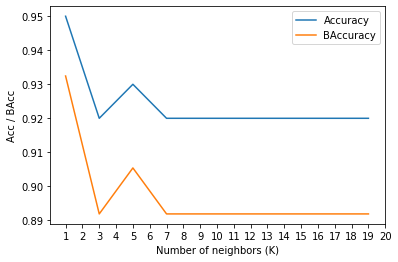

In [14]:
x_axis_K = []
y_axis_acc = []
y_axis_Bacc = []

distances = [L2_Norm, L1_Norm, CosineSimilarity]
dataSets = [dev_set, test_set]

        
# Dataset for which we want to calculate accuracy
dataSet_run = test_set 

# Run KNN for diffrent values of K
for i in range(20):
    if i%2 == 0:
        continue

    print('K = ', i)
    preds = run(dataSet_run, train_set, K=i, Distance = L1_Norm)
    acc = accuracy(preds, dataSet_run[:,-1])
    b_acc = Baccuracy(preds, dataSet_run[:,-1])
    print('Accuracy = ', acc)
    print('BAccuracy = ', b_acc)

    x_axis_K.append(i)
    y_axis_acc.append(acc)
    y_axis_Bacc.append(b_acc)

#plot the acc vs K plot
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis_K, y_axis_acc, label = 'Accuracy')
plt.plot(x_axis_K, y_axis_Bacc, label = 'BAccuracy')
plt.ylabel('Acc / BAcc')
plt.xlabel('Number of neighbors (K)')
plt.xticks(xi)
axes = plt.gca()
axes.legend()
plt.show()

##### For Cosine Similarity

K =  1
Accuracy =  0.67
BAccuracy =  0.5540540540540541
K =  3
Accuracy =  0.27
BAccuracy =  0.2365937365937366
K =  5
Accuracy =  0.31
BAccuracy =  0.27391677391677394
K =  7
Accuracy =  0.34
BAccuracy =  0.32003432003432003
K =  9
Accuracy =  0.29
BAccuracy =  0.26919776919776917
K =  11
Accuracy =  0.29
BAccuracy =  0.27477477477477474
K =  13
Accuracy =  0.33
BAccuracy =  0.31209781209781207
K =  15
Accuracy =  0.35
BAccuracy =  0.33354783354783357
K =  17
Accuracy =  0.33
BAccuracy =  0.31767481767481764
K =  19
Accuracy =  0.33
BAccuracy =  0.31767481767481764


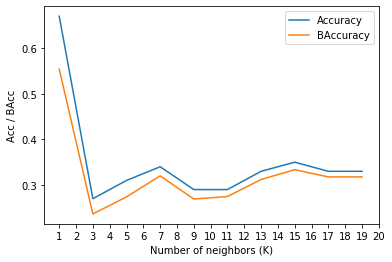

In [15]:
x_axis_K = []
y_axis_acc = []
y_axis_Bacc = []

distances = [L2_Norm, L1_Norm, CosineSimilarity]
dataSets = [dev_set, test_set]

        
# Dataset for which we want to calculate accuracy
dataSet_run = test_set 

# Run KNN for diffrent values of K
for i in range(20):
    if i%2 == 0:
        continue

    print('K = ', i)
    preds = run(dataSet_run, train_set, K=i, Distance = CosineSimilarity)
    acc = accuracy(preds, dataSet_run[:,-1])
    b_acc = Baccuracy(preds, dataSet_run[:,-1])
    print('Accuracy = ', acc)
    print('BAccuracy = ', b_acc)

    x_axis_K.append(i)
    y_axis_acc.append(acc)
    y_axis_Bacc.append(b_acc)

#plot the acc vs K plot
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis_K, y_axis_acc, label = 'Accuracy')
plt.plot(x_axis_K, y_axis_Bacc, label = 'BAccuracy')
plt.ylabel('Acc / BAcc')
plt.xlabel('Number of neighbors (K)')
plt.xticks(xi)
axes = plt.gca()
axes.legend()
plt.show()